In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from sklearn.cluster import MiniBatchKMeans, MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import estimate_bandwidth


from utils.paths import DATA_RAW_DIR

In [2]:
path_candy = str(DATA_RAW_DIR / "candy.csv")
print(Path(path_candy).exists())
df_candy = pd.read_csv(path_candy, sep=",", encoding="utf-8")
df_candy.head()

True


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [3]:
X = df_candy.drop(columns=["competitorname"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:


bandwidth = estimate_bandwidth(X_scaled, quantile=0.2, n_samples=100)

In [5]:
model_meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
model_meanshift.fit(X_scaled)

MeanShift(bandwidth=np.float64(3.6447719511411405), bin_seeding=True)

In [6]:
df_candy["cluster"] = model_meanshift.labels_

In [7]:
print(f"Found Clusters: {len(np.unique(model_meanshift.labels_))}")

Found Clusters: 3


   chocolate    fruity   caramel  peanutyalmondy    nougat  crispedricewafer  \
0  -0.511251  0.490458 -0.296997       -0.395034 -0.299572         -0.299572   
1   1.138990 -0.899172  0.711391       -0.058905 -0.299572          3.338092   
2   0.850852 -0.899172  1.096539        0.711391  3.338092         -0.299572   

       hard       bar  pluribus  sugarpercent  pricepercent  winpercent  \
0  0.204803 -0.530666  0.346740     -0.175059     -0.456349   -0.462325   
1 -0.462910  1.414520 -0.750047      0.233498      1.095780    1.083810   
2 -0.462910  1.745743 -1.035940      0.410857      0.511384    0.665533   

   cluster  
0        0  
1        1  
2        2  


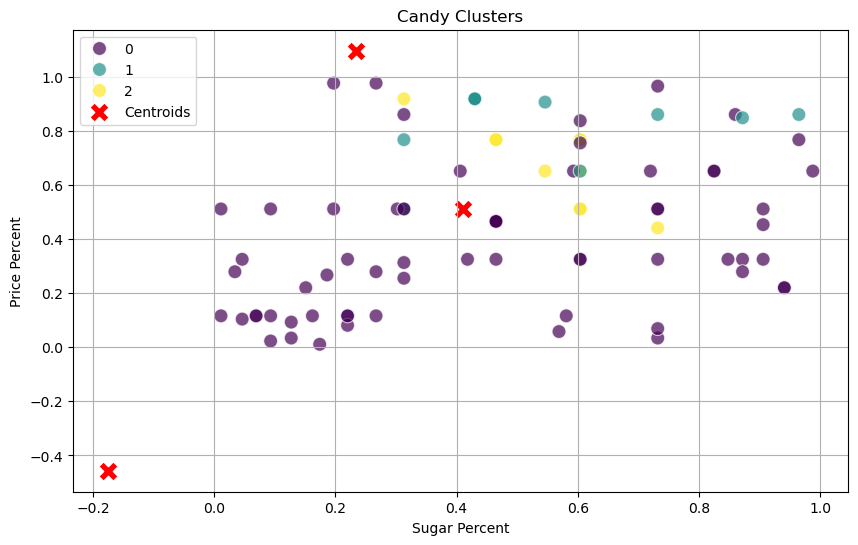

In [9]:
# centroids
centroids = cluster_centers = model_meanshift.cluster_centers_
df_centroids = pd.DataFrame(centroids, columns=X.columns)
df_centroids["cluster"] = np.arange(len(df_centroids))
print(df_centroids)
# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_candy, x="sugarpercent", y="pricepercent",
                hue="cluster", palette="viridis", s=100, alpha=0.7)
sns.scatterplot(data=df_centroids, x="sugarpercent", y="pricepercent",
                color="red", marker="X", s=200, label="Centroids")
plt.title("Candy Clusters")
plt.xlabel("Sugar Percent")
plt.ylabel("Price Percent")
plt.legend()
plt.grid()
plt.show()

In [10]:
df_candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,cluster
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,2
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,0
